In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('2025-03.csv')

In [ ]:
df.shape

(1832587, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832587 entries, 0 to 1832586
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Genero_Usuario         object 
 1   Edad_Usuario           float64
 2   Bici                   int64  
 3   Ciclo_Estacion_Retiro  object 
 4   Fecha_Retiro           object 
 5   Hora_Retiro            object 
 6   Ciclo_EstacionArribo   object 
 7   Fecha_Arribo           object 
 8   Hora_Arribo            object 
dtypes: float64(1), int64(1), object(7)
memory usage: 125.8+ MB


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import io

In [ ]:
url = "https://ecobici.cdmx.gob.mx/wp-content/uploads/2025/04/2025-03.csv"
csv_file_name = "2025-03.csv"

print(f"Descargando datos desde: {url}")
try:
    response = requests.get(url, timeout=1200)
    response.raise_for_status()
    print("Descarga completada con éxito")

except requests.exceptions.RequestException as e:
    print(f"Error al descargar los datos: {e}")
    df_raw = pd.DataFrame()
except requests.exceptions.RequestException as e:
    print(f"Error al descargar los datos: {e}")
    df_raw = pd.DataFrame()

Descargando datos desde: https://ecobici.cdmx.gob.mx/wp-content/uploads/2025/04/2025-03.csv
Descarga completada con éxito


In [ ]:
with open(csv_file_name, "wb") as f:
    f.write(response.content)
print(f"Archivo zip guardado como {csv_file_name}")

print(f"Leyendo datos desde {csv_file_name}")
df_raw = pd.read_csv(csv_file_name)
print("Extracción completada con éxito")
print(f"Se cargaron {df_raw.shape[0]} registros")

Archivo zip guardado como 2025-03.csv
Leyendo datos desde 2025-03.csv
Extracción completada con éxito
Se cargaron 1832587 registros


In [ ]:
print("Tamaño del DataFrame:")
print(df_raw.shape)
print("\nPrevisualizaión del DataFrame:")
display(df_raw.head(50))

Tamaño del DataFrame:
(1832587, 9)

Previsualizaión del DataFrame:


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo
0,M,29.0,3021250,263,28/02/2025,23:46:00,116,01/03/2025,00:00:08
1,M,30.0,8828782,060,28/02/2025,23:50:06,128,01/03/2025,00:00:10
2,M,26.0,7379795,036,28/02/2025,23:56:44,037,01/03/2025,00:00:10
3,M,24.0,3012796,154,28/02/2025,23:27:12,542,01/03/2025,00:00:18
4,M,25.0,2854842,640,28/02/2025,23:39:13,280,01/03/2025,00:00:22
5,F,26.0,4277828,679,28/02/2025,23:46:35,704,01/03/2025,00:00:24
6,M,30.0,5082813,668,28/02/2025,23:37:48,349,01/03/2025,00:00:25
7,M,36.0,5222740,425,28/02/2025,23:49:12,630,01/03/2025,00:00:26
8,M,27.0,7693930,122,28/02/2025,23:36:24,630,01/03/2025,00:00:27
9,F,34.0,5502869,555,28/02/2025,23:33:43,487,01/03/2025,00:00:37


In [ ]:
df = df_raw.copy()

In [ ]:
faltantes = df.isnull().sum()

resumen_faltantes = pd.DataFrame({
    'Faltantes': faltantes,
})

print(resumen_faltantes)

                       Faltantes
Genero_Usuario                 0
Edad_Usuario                  98
Bici                           0
Ciclo_Estacion_Retiro          0
Fecha_Retiro                   0
Hora_Retiro                    0
Ciclo_EstacionArribo           0
Fecha_Arribo                   0
Hora_Arribo                    0


In [ ]:
df['Genero_Usuario'].value_counts()

,count
Genero_Usuario,
M,1250246
F,514597
O,34724
?,33020


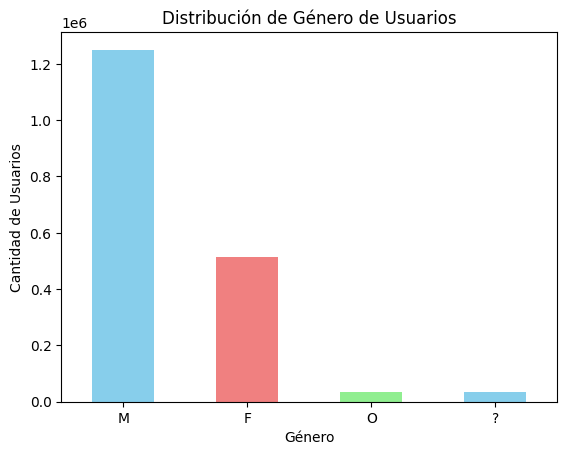

In [ ]:
conteo_genero = df['Genero_Usuario'].value_counts()

conteo_genero.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])

plt.title('Distribución de Género de Usuarios')
plt.xlabel('Género')
plt.ylabel('Cantidad de Usuarios')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Genero_Usuario'])

In [ ]:
df_encoded.head()

,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,Genero_Usuario_?,Genero_Usuario_F,Genero_Usuario_M,Genero_Usuario_O
0,29.0,3021250,263,28/02/2025,23:46:00,116,01/03/2025,00:00:08,False,False,True,False
1,30.0,8828782,060,28/02/2025,23:50:06,128,01/03/2025,00:00:10,False,False,True,False
2,26.0,7379795,036,28/02/2025,23:56:44,037,01/03/2025,00:00:10,False,False,True,False
3,24.0,3012796,154,28/02/2025,23:27:12,542,01/03/2025,00:00:18,False,False,True,False
4,25.0,2854842,640,28/02/2025,23:39:13,280,01/03/2025,00:00:22,False,False,True,False


In [ ]:
df['Retiro'] = pd.to_datetime(df['Fecha_Retiro'] + " " + df['Hora_Retiro'], format="%d/%m/%Y %H:%M:%S")
df['Arribo'] = pd.to_datetime(df['Fecha_Arribo'] + " " + df['Hora_Arribo'], format="%d/%m/%Y %H:%M:%S")

In [ ]:
df['Duracion'] = df['Arribo'] - df['Retiro']

In [ ]:
df['Duracion'].max()

Timedelta('677 days 03:48:55')

In [ ]:
bins = [0, 20*60, 40*60, 60*60, float('inf')]
labels = ['Corto', 'Mediano', 'Largo', 'Muy largo']

df['Categoria_Duracion'] = pd.cut(df['Duracion'].dt.total_seconds(), bins=bins, labels=labels, right=False)

print(df['Categoria_Duracion'].value_counts())

Categoria_Duracion
Corto        1357254
Mediano       410609
Largo          54860
Muy largo       9864
Name: count, dtype: int64


In [ ]:
display(df.head())

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,Retiro,Arribo,Duracion,Categoria_Duracion
0,M,29.0,3021250,263,28/02/2025,23:46:00,116,01/03/2025,00:00:08,2025-02-28 23:46:00,2025-03-01 00:00:08,0 days 00:14:08,Corto
1,M,30.0,8828782,060,28/02/2025,23:50:06,128,01/03/2025,00:00:10,2025-02-28 23:50:06,2025-03-01 00:00:10,0 days 00:10:04,Corto
2,M,26.0,7379795,036,28/02/2025,23:56:44,037,01/03/2025,00:00:10,2025-02-28 23:56:44,2025-03-01 00:00:10,0 days 00:03:26,Corto
3,M,24.0,3012796,154,28/02/2025,23:27:12,542,01/03/2025,00:00:18,2025-02-28 23:27:12,2025-03-01 00:00:18,0 days 00:33:06,Mediano
4,M,25.0,2854842,640,28/02/2025,23:39:13,280,01/03/2025,00:00:22,2025-02-28 23:39:13,2025-03-01 00:00:22,0 days 00:21:09,Mediano


In [ ]:
df_encoded = pd.get_dummies(df, columns=['Genero_Usuario'])
df_encoded = pd.get_dummies(df_encoded, columns=['Categoria_Duracion'])

In [ ]:
display(df_encoded.head())

,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,Retiro,Arribo,Duracion,Genero_Usuario_?,Genero_Usuario_F,Genero_Usuario_M,Genero_Usuario_O,Categoria_Duracion_Corto,Categoria_Duracion_Mediano,Categoria_Duracion_Largo,Categoria_Duracion_Muy largo
0,29.0,3021250,263,28/02/2025,23:46:00,116,01/03/2025,00:00:08,2025-02-28 23:46:00,2025-03-01 00:00:08,0 days 00:14:08,False,False,True,False,True,False,False,False
1,30.0,8828782,060,28/02/2025,23:50:06,128,01/03/2025,00:00:10,2025-02-28 23:50:06,2025-03-01 00:00:10,0 days 00:10:04,False,False,True,False,True,False,False,False
2,26.0,7379795,036,28/02/2025,23:56:44,037,01/03/2025,00:00:10,2025-02-28 23:56:44,2025-03-01 00:00:10,0 days 00:03:26,False,False,True,False,True,False,False,False
3,24.0,3012796,154,28/02/2025,23:27:12,542,01/03/2025,00:00:18,2025-02-28 23:27:12,2025-03-01 00:00:18,0 days 00:33:06,False,False,True,False,False,True,False,False
4,25.0,2854842,640,28/02/2025,23:39:13,280,01/03/2025,00:00:22,2025-02-28 23:39:13,2025-03-01 00:00:22,0 days 00:21:09,False,False,True,False,False,True,False,False


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832587 entries, 0 to 1832586
Data columns (total 19 columns):
 #   Column                        Dtype          
---  ------                        -----          
 0   Edad_Usuario                  float64        
 1   Bici                          int64          
 2   Ciclo_Estacion_Retiro         object         
 3   Fecha_Retiro                  object         
 4   Hora_Retiro                   object         
 5   Ciclo_EstacionArribo          object         
 6   Fecha_Arribo                  object         
 7   Hora_Arribo                   object         
 8   Retiro                        datetime64[ns] 
 9   Arribo                        datetime64[ns] 
 10  Duracion                      timedelta64[ns]
 11  Genero_Usuario_?              bool           
 12  Genero_Usuario_F              bool           
 13  Genero_Usuario_M              bool           
 14  Genero_Usuario_O              bool           
 15  Categoria_Durac

In [ ]:
print(df_encoded.head())

   Edad_Usuario     Bici Ciclo_Estacion_Retiro Fecha_Retiro Hora_Retiro  \
0          29.0  3021250                   263   28/02/2025    23:46:00   
1          30.0  8828782                   060   28/02/2025    23:50:06   
2          26.0  7379795                   036   28/02/2025    23:56:44   
3          24.0  3012796                   154   28/02/2025    23:27:12   
4          25.0  2854842                   640   28/02/2025    23:39:13   

  Ciclo_EstacionArribo Fecha_Arribo Hora_Arribo              Retiro  \
0                  116   01/03/2025    00:00:08 2025-02-28 23:46:00   
1                  128   01/03/2025    00:00:10 2025-02-28 23:50:06   
2                  037   01/03/2025    00:00:10 2025-02-28 23:56:44   
3                  542   01/03/2025    00:00:18 2025-02-28 23:27:12   
4                  280   01/03/2025    00:00:22 2025-02-28 23:39:13   

               Arribo        Duracion  Genero_Usuario_?  Genero_Usuario_F  \
0 2025-03-01 00:00:08 0 days 00:14:08        

### Predecir viajes atípicos?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
df_encoded["Duracion_min"] = df_encoded["Duracion"].dt.total_seconds() / 60
df_encoded["Viaje_Atipico"] = (df_encoded["Duracion_min"] > 60).astype(int)

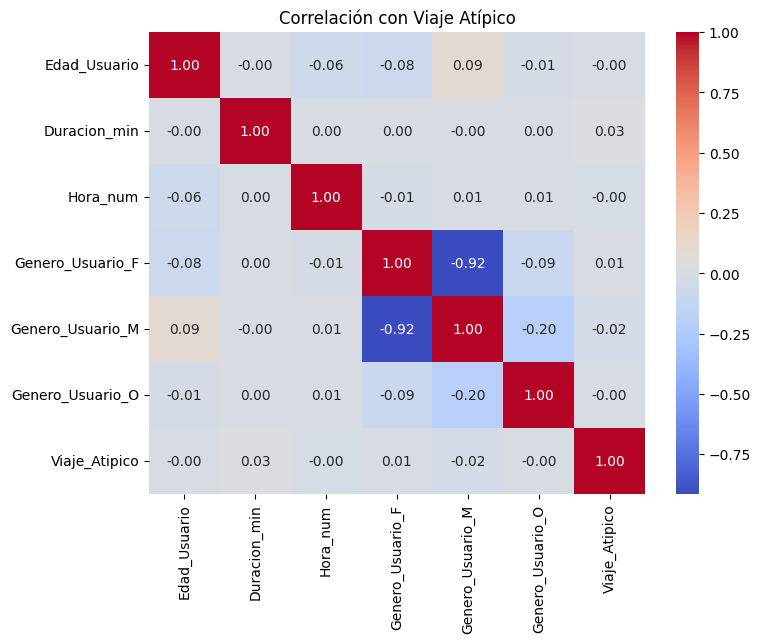

Viaje_Atipico       1.000000
Duracion_min        0.027057
Genero_Usuario_M    0.021204
Genero_Usuario_F    0.011634
Hora_num            0.004398
Edad_Usuario        0.001366
Genero_Usuario_O    0.001247
Name: Viaje_Atipico, dtype: float64


In [ ]:
# Target
df_encoded["Duracion_min"] = df_encoded["Duracion"].dt.total_seconds() / 60
df_encoded["Viaje_Atipico"] = (df_encoded["Duracion_min"] > 60).astype(int)

# Hora de Retiro como numérica
df_encoded["Hora_num"] = pd.to_datetime(df_encoded["Hora_Retiro"], format="%H:%M:%S").dt.hour

# Seleccionar columnas numéricas relevantes
cols = [
    "Edad_Usuario",
    "Duracion_min",
    "Hora_num",
    "Genero_Usuario_F",
    "Genero_Usuario_M",
    "Genero_Usuario_O",
    "Viaje_Atipico"
]

corr = df_encoded[cols].corr(method="pearson")

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación con Viaje Atípico")
plt.show()

# Mostrar ranking de correlaciones con el target
print(corr["Viaje_Atipico"].abs().sort_values(ascending=False))

Reducimos viajes no atípicos

In [ ]:
from sklearn.utils import resample

# Dividir dataset en viajes atípicos y normales
df_atipicos = df_encoded[df_encoded["Viaje_Atipico"] == 1]
df_normales = df_encoded[df_encoded["Viaje_Atipico"] == 0]

# Submuestrear los normales al mismo tamaño que los atípicos
df_normales_down = resample(df_normales,
                            replace=False,
                            n_samples=len(df_atipicos),
                            random_state=42)

# Combinar
df_balanced = pd.concat([df_atipicos, df_normales_down])

print("Tamaño original:", len(df_encoded))
print("Tamaño balanceado:", len(df_balanced))
print(df_balanced["Viaje_Atipico"].value_counts())


Tamaño original: 1832587
Tamaño balanceado: 19716
Viaje_Atipico
1    9858
0    9858
Name: count, dtype: int64


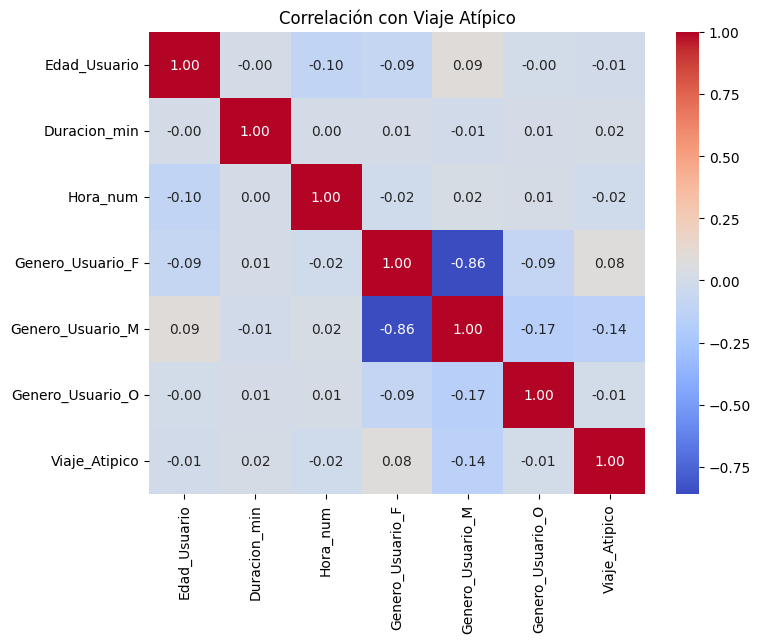

Viaje_Atipico       1.000000
Genero_Usuario_M    0.142004
Genero_Usuario_F    0.080506
Hora_num            0.023405
Duracion_min        0.019198
Edad_Usuario        0.013771
Genero_Usuario_O    0.006198
Name: Viaje_Atipico, dtype: float64


In [ ]:
corr = df_balanced[cols].corr(method="pearson")

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación con Viaje Atípico")
plt.show()

# Mostrar ranking de correlaciones con el target
print(corr["Viaje_Atipico"].abs().sort_values(ascending=False))

In [ ]:
df_encoded["Hora_num"] = pd.to_datetime(df_encoded["Hora_Retiro"], format="%H:%M:%S").dt.hour
df_encoded["Dia_semana"] = pd.to_datetime(df_encoded["Fecha_Retiro"], format="%d/%m/%Y").dt.dayofweek

features = [
    "Edad_Usuario",
    "Hora_num",
    "Dia_semana",
    "Genero_Usuario_F",
    "Genero_Usuario_M",
    "Genero_Usuario_O"
]

X = df_encoded[features]
y = df_encoded["Viaje_Atipico"]

# ===============================
# 3. Train/Test split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===============================
# 4. Modelo (Random Forest)
# ===============================
clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    class_weight="balanced"
)

clf.fit(X_train, y_train)

# ===============================
# 5. Evaluación
# ===============================
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("\nROC-AUC:", roc_auc_score(y_test, y_proba))

# ===============================
# 6. Importancia de variables
# ===============================
importances = pd.DataFrame({
    "feature": features,
    "importance": clf.feature_importances_
}).sort_values("importance", ascending=False)

print("\nFeature Importances:")
print(importances)